In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import time
from sklearn.model_selection import train_test_split as tts

In [2]:
dataset= pd.read_csv('new_appdata10.csv')

In [3]:
response=dataset['enrolled']
dataset = dataset.drop(columns = 'enrolled')


In [4]:
X_train,X_test,y_train,y_test=tts(dataset,response,test_size=.2,random_state = 0)

In [5]:
train_identifier =X_train["user"]
X_train=X_train.drop(columns=['user'])

In [6]:
test_identifier =X_test["user"]
X_test=X_test.drop(columns=['user'])

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc_X = StandardScaler()

In [9]:
X_train2 = pd.DataFrame(sc_X.fit_transform(X_train))

/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [10]:
X_test2 = pd.DataFrame(sc_X.fit_transform(X_test))

/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
X_train2.columns=X_train.columns.values

In [12]:
X_test2.columns=X_test.columns.values

In [13]:
X_train2.index=X_train.index.values
X_test2.index=X_test.index.values

In [14]:
X_train = X_train2
X_test = X_test2

In [15]:
X_test.head()

,dayofweek,hour,age,numscreens,minigame,used_premium_feature,liked,location,Institutions,VerifyPhone,...,SecurityModal,ResendToken,TransactionList,NetworkFailure,ListPicker,other,SavingsCount,CMCount,CCCount,LoansCount
11841,-1.496239,-1.554724,0.866223,0.824043,-0.350843,-0.449198,2.262731,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,1.329613,-0.255034,-0.756633,-0.286358,-1.155734
19602,0.958624,-0.882463,-0.535024,0.571073,-0.350843,-0.449198,-0.441944,0.976477,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.778912,-0.255034,-0.756633,-0.286358,0.322565
45519,-1.496239,0.327606,0.492557,-0.630533,-0.350843,2.226191,-0.441944,-1.024090,-0.644537,-1.042085,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.322491,-0.255034,0.066599,-0.286358,1.800864
25747,0.958624,0.865414,-1.002106,-0.504049,-0.350843,-0.449198,2.262731,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,0.503561,-0.255034,-0.756633,-0.286358,-1.155734
42642,0.958624,-1.554724,-0.161358,0.697558,-0.350843,-0.449198,-0.441944,-1.024090,-0.644537,0.959615,...,-0.121722,-0.111594,-0.119159,-0.089803,-0.088089,-0.597841,1.947331,-0.756633,3.027972,-1.155734


In [16]:
from sklearn.linear_model import LogisticRegression as LR

In [23]:
classifier  = LR(random_state = 0,penalty= 'l1')

In [24]:
classifier.fit(X_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [25]:
y_pred = classifier.predict(X_test)

In [26]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

In [27]:
cm = confusion_matrix(y_test,y_pred)
accuracy_score(y_test,y_pred)

0.769

In [30]:
precision_score(y_test,y_pred)

0.7620096076861489

In [31]:
recall_score(y_test,y_pred)

0.7725243506493507

In [32]:
df_cm = pd.  DataFrame(cm)  

In [33]:
df_cm

,0,1
0,3883,1189
1,1121,3807


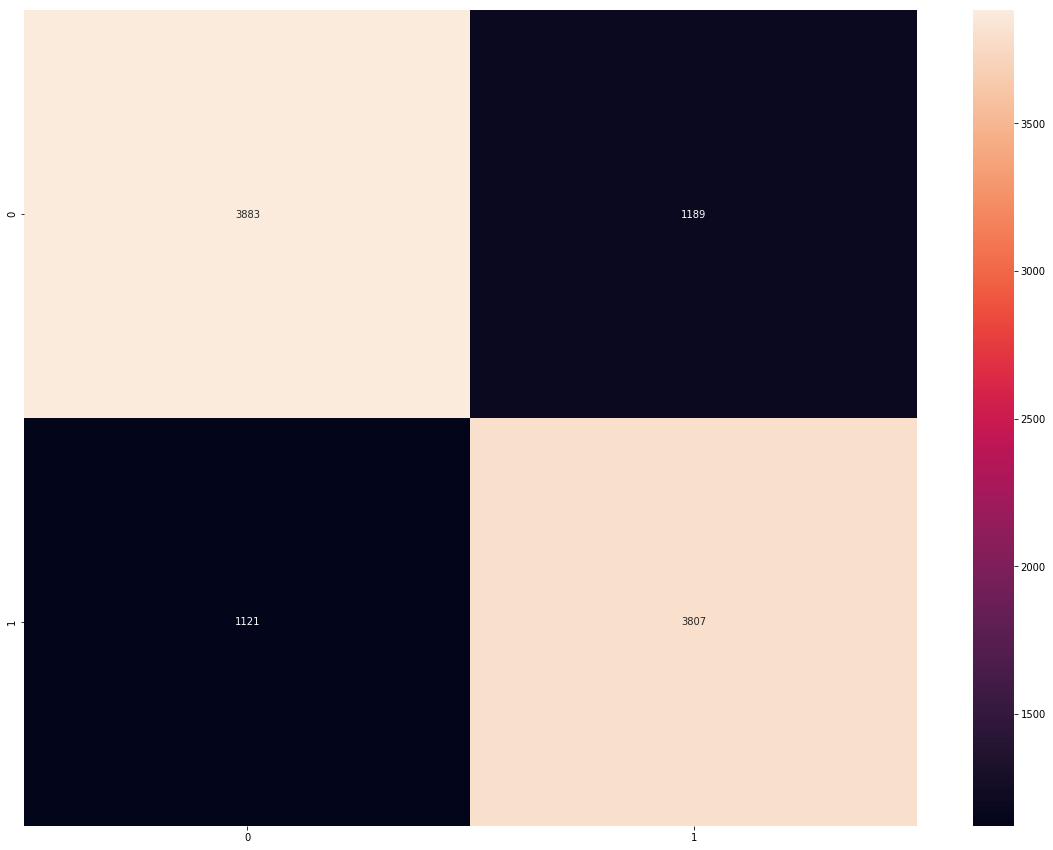

In [36]:
plt.figure(figsize = (20,15))
sn.heatmap(df_cm,annot=True,fmt = 'g')

In [39]:
from sklearn.model_selection  import cross_val_score 

In [40]:
accuracies = cross_val_score(estimator = classifier, X=X_train,y= y_train,cv= 10)

/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/satyam/.conda/envs/tensorflow/lib/python3.6/site-packages/sklearn/linear_model/logisti

In [41]:
 print(accuracies.mean())

0.7674749004203063


In [44]:
print(accuracies.std()*2)

0.008539153513941165


In [45]:
final_results = pd.concat([y_test,test_identifier],axis = 1).dropna()

In [46]:
final_results['predicted_results'] = y_pred

In [47]:
final_results[['user','enrolled','predicted_results']].reset_index(drop = True)

,user,enrolled,predicted_results
0,239786,1,1
1,279644,1,1
2,98290,0,0
3,170150,1,1
4,237568,1,1
5,65042,1,0
6,207226,1,1
7,363062,0,0
8,152296,1,1
9,64484,0,0
